# 项目：信用贷款违约检测

## 一、主训练集探索

In [1]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple cufflinks

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple plotly

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import pandas as pd
import plotly.offline as offline
offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()
plt.style.use('fivethirtyeight')


In [4]:
# 读取数据集
app_train = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
app_test = pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")

In [5]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### 1. 数据探索
（1）缺失值/异常值

（2）大概探索一下违约贷款人和不违约的人的profile有什么区别。

#### 缺失值检测

In [6]:
#定义缺失值检测函数
def missing_values_table(df):
    #total missing values
    mis_val = df.isnull().sum()
    
    #Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make a table wirh the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    # rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values', 1: '% of total values'})
    
    # Sort the table by % of missing DESC
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values("% of total values", ascending = False).round(1)
    
    # Pring information
    print("Total columns: " + str(df.shape[1]) + "\n" + "columns with missing values:" + str(mis_val_table_ren_columns.shape[0]))
    
    return mis_val_table_ren_columns

In [7]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Total columns: 122
columns with missing values:67


Missing Values  % of total values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

数据一共有122列，有67列存在缺失情况，最高缺失值的列缺失度为69.9%。

#### 异常值探索

查看特征的均值、极大值、极小值等信息判断是否有异常值

In [8]:
(app_train['DAYS_BIRTH']/ -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

查看用户年龄的数据分布情况（因为数据中，年龄的数值是负数，反映的是申请贷款前，这个用户活了多少天，所以这里我除了负365做了下处理）,发现数据的分布还是比较正常的，最大年龄69岁，最小年龄20岁，没有很异常的数字

In [9]:
(app_train['DAYS_EMPLOYED'] /  -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

查看用户的工作时间分布情况发现（同样工作时间也是负数，所以我除了负365），最小值是-1000年，这里的-1000年明显是一个异常数据，没有人的工作时间是负数的，这可能是个异常值。

In [ ]:
(app_train['DAYS_EMPLOYED']/-365).describe()

看一下用户受工作时间的数据分布情况，发现所有的异常值都是一个值，365243，对于这个异常值我的理解是它可能是代表缺失值，所以我的选择是将这个异常值用空值去替换，这样可以保留这个信息，又抹去了异常值，替换之后我们再看一下工作时间的分布情况，正常了很多

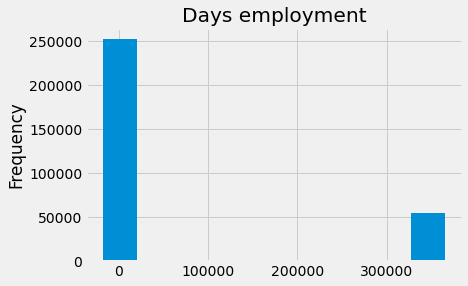

In [10]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days employment')

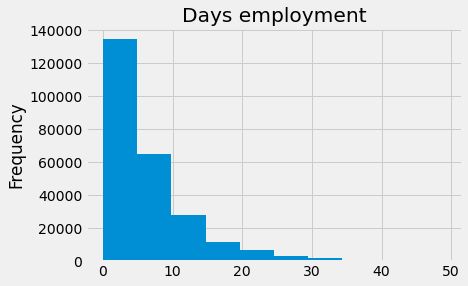

In [11]:
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)
(app_train['DAYS_EMPLOYED'] / -365).plot.hist(title = 'Days employment')

### 违约用户profile的探索


In [12]:
#画图代码
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();
    
def plot_distribution(var):
    
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

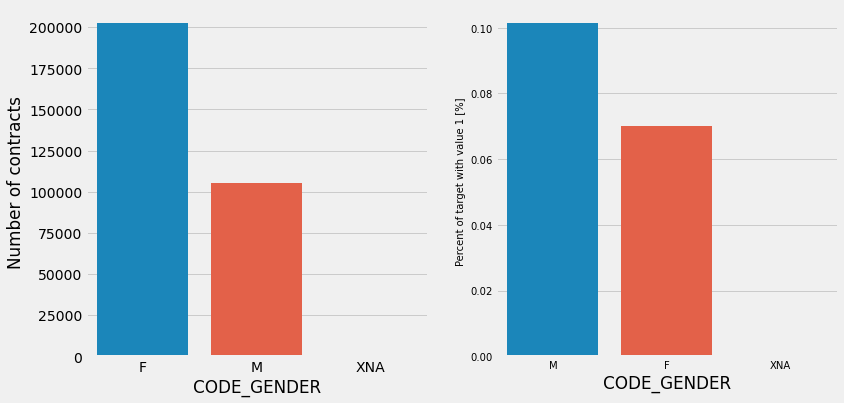

In [13]:
plot_stats('CODE_GENDER')

男性和女性用户的违约率情况，发现男性用户违约率更高，男性用户违约率为10%，女性为7%

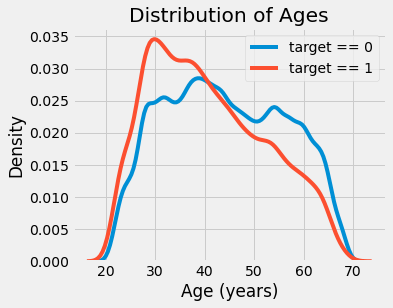

In [14]:
plt.figure(figsize = (5, 4))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages');

违约用户和正常用户的年龄分布情况，因为年龄是连续型变量，和性别不同，所以使用分布图去看年龄的分布情况，通过数据分布我们可以看到，违约用户年轻用户分布更多，所以可以推断的结论是用户年龄越小，违约的可能性越大。

Text(0.5, 1.0, 'Failure to repay by age group')

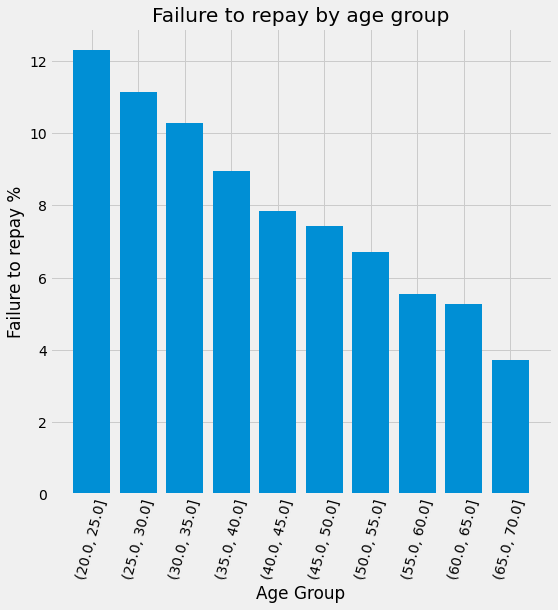

In [15]:
#对年龄进行分段
age_data = app_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] /  -365

#Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_groups = age_data.groupby('YEARS_BINNED').mean()
plt.figure(figsize = (8,8))

#Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

#Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group')
plt.ylabel('Failure to repay %')
plt.title('Failure to repay by age group')

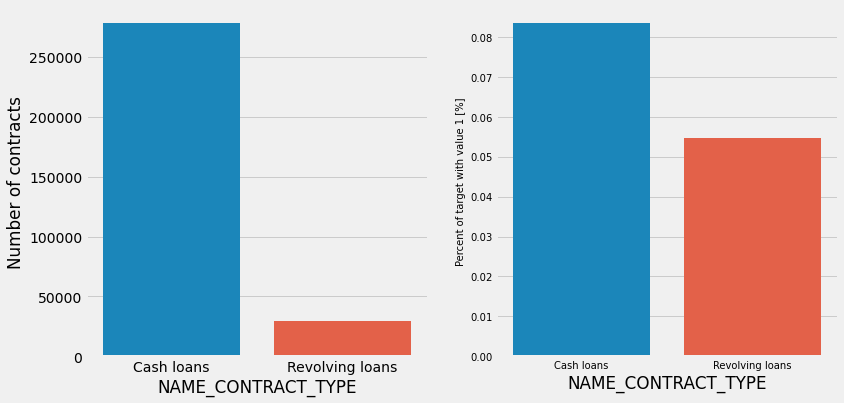

In [16]:
#不同贷款类型的违约情况
plot_stats('NAME_CONTRACT_TYPE')

不同贷款类型的违约率情况，对于现金贷款和流动资金循坏贷款，现金贷款的违约率更高

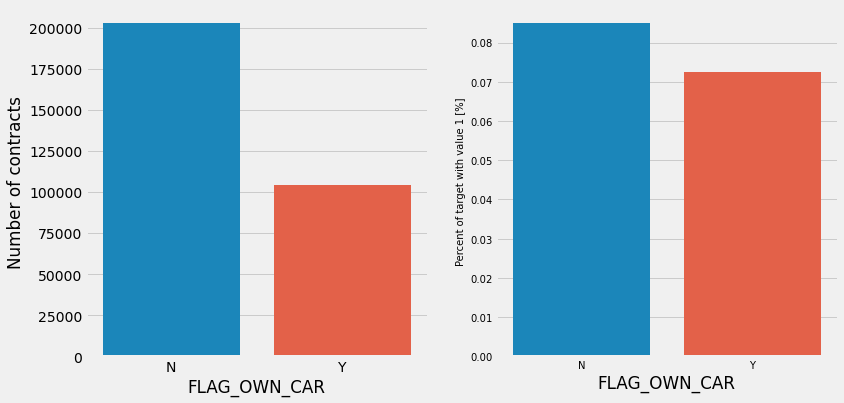

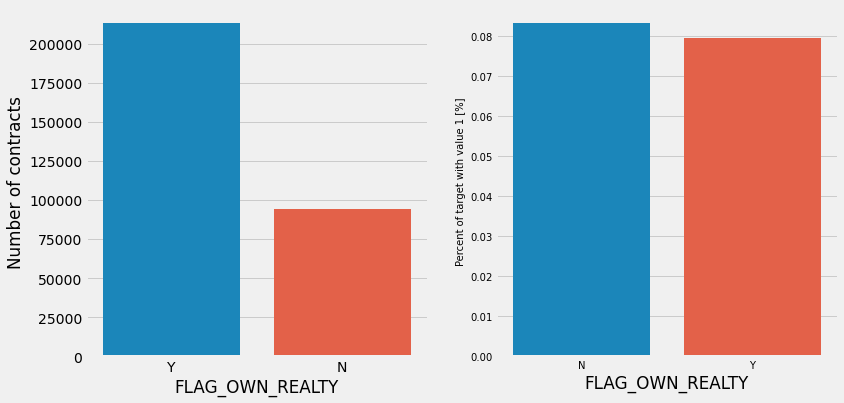

In [17]:
#有无车和房
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

用户有没有房和车对违约率的影响，发现没有车和房的人违约率更高，但相差并不是很大

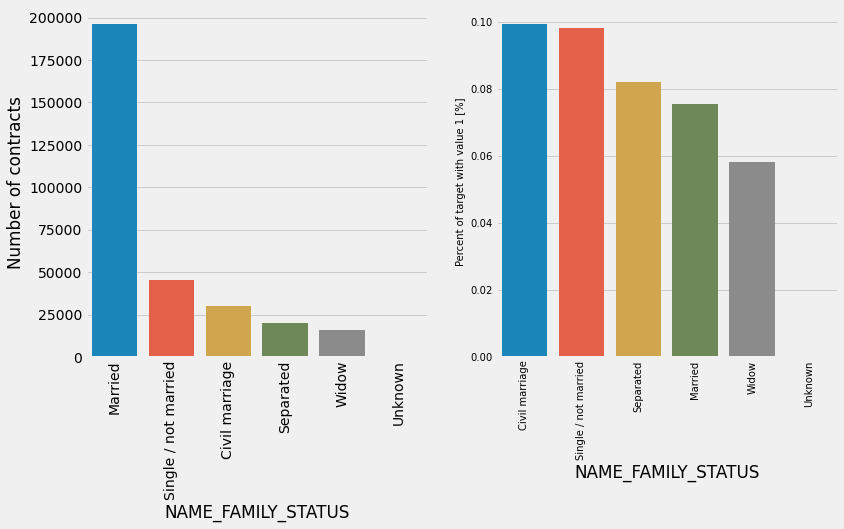

In [18]:
#家庭状态
plot_stats('NAME_FAMILY_STATUS', True)

从家庭情况看，申请的用户大多已经结婚，单身和世俗结婚的违约率较高，寡居的违约率最低

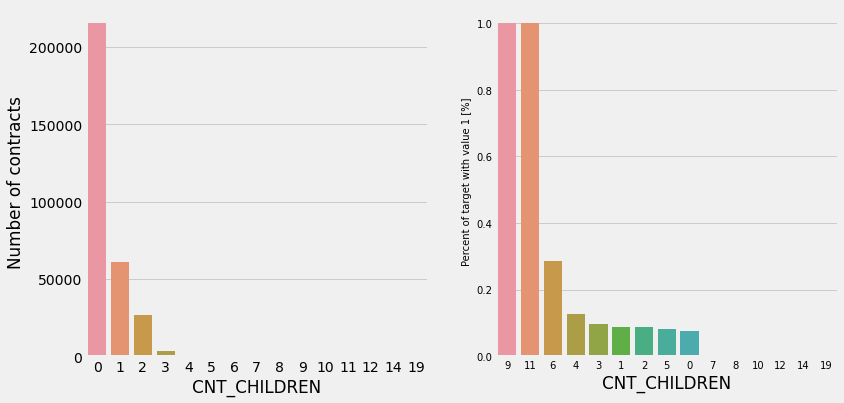

In [19]:
#子女情况
plot_stats('CNT_CHILDREN')



大部分申请者没有孩子或孩子在3个以下，孩子越多的家庭违约率越高，发现对于有9、11个孩
子的家庭违约率达到了100%（和样本少也有关系

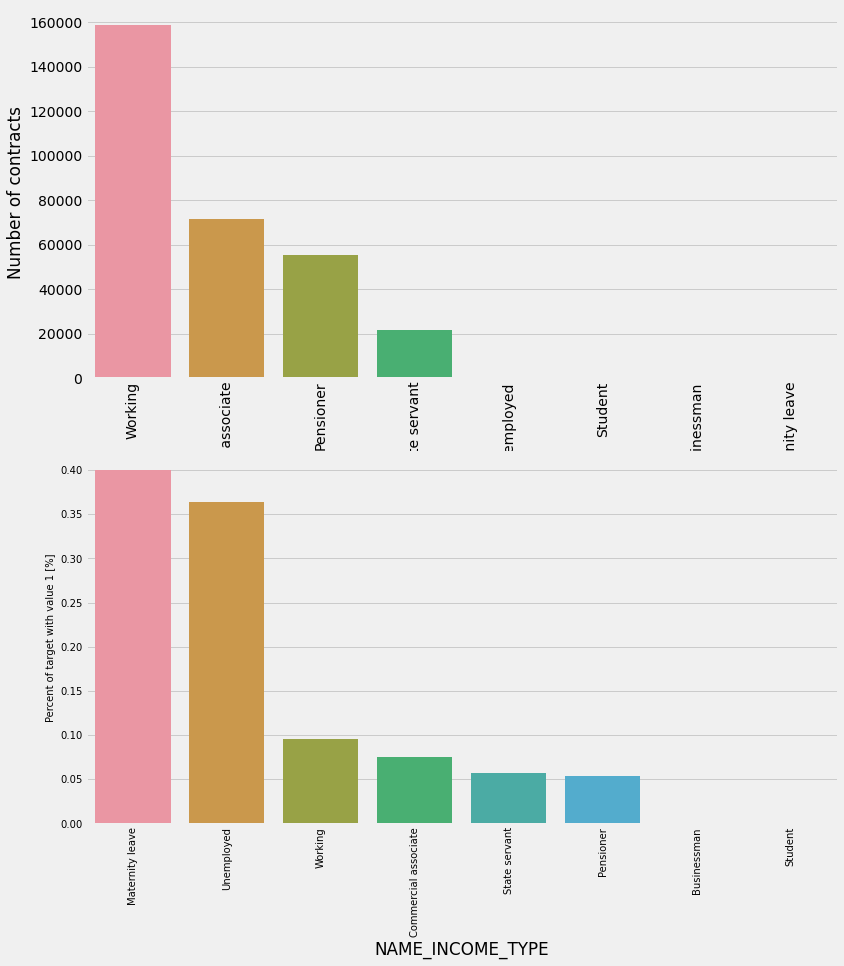

In [20]:
#收入
plot_stats('NAME_INCOME_TYPE', True, False)

根据申请者的收入类型区分，可以发现休产假和没有工作的人违约率较高，在35%以上，对于这两类人群放款需较为谨慎

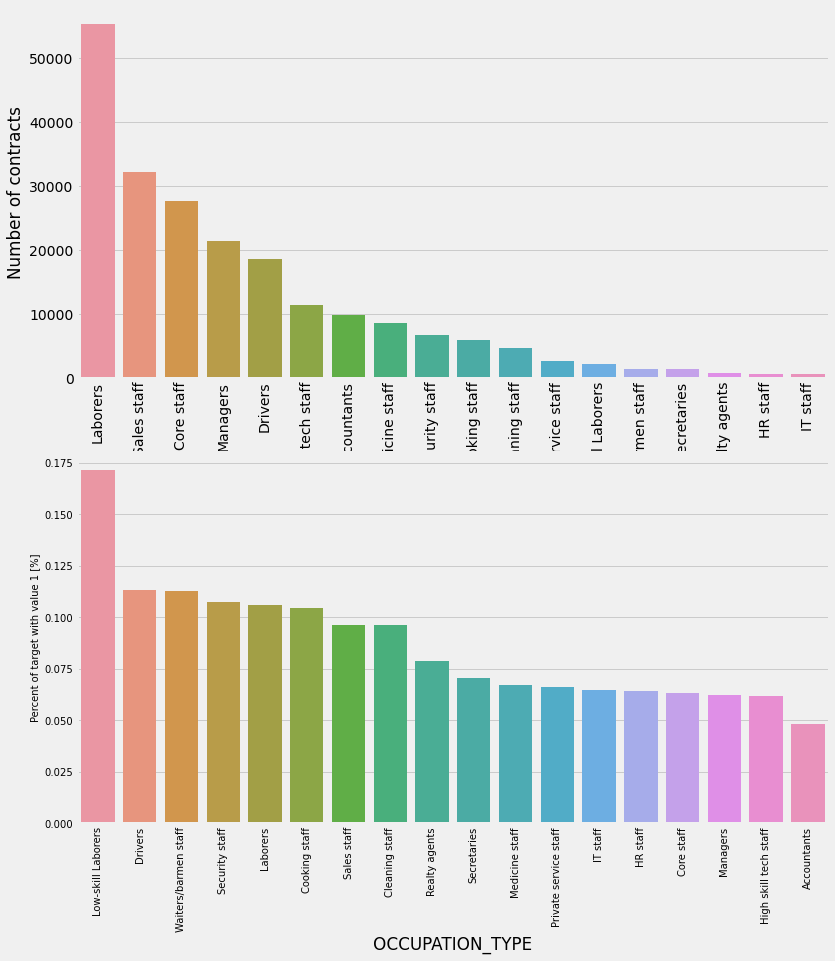

In [21]:
plot_stats('OCCUPATION_TYPE',True, False)

从职业来看，越相对收入较低、不稳定的职业违约率越高，比如低廉劳动力、司机、理发师，而像会计、高科技
员工等具有稳定高收入的职业违约率就较低

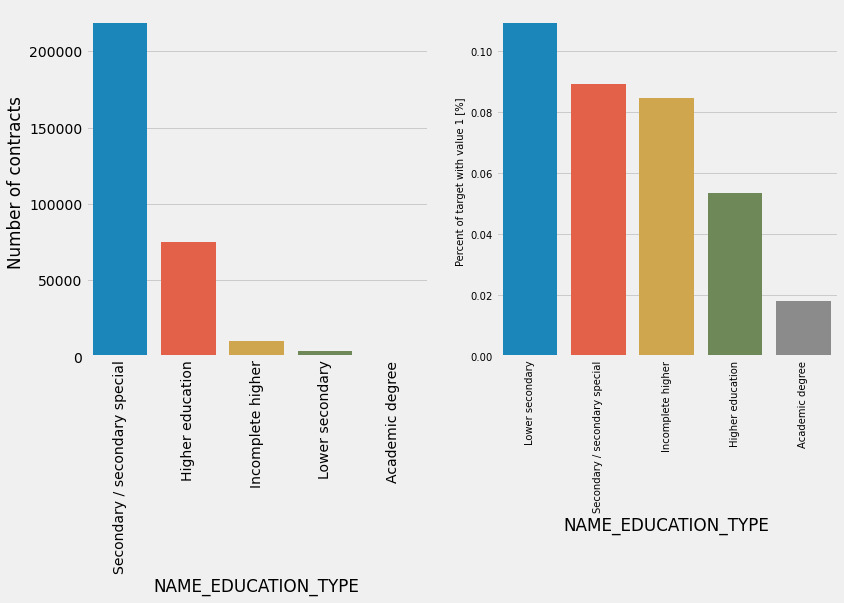

In [22]:
plot_stats('NAME_EDUCATION_TYPE',True)

贷款申请人大多受教育的程度为中学，学历越低越容易违约

## 二、特征工程
根据对特征的理解，尝试做出一些新的特征

1. CREDIT_INCOME_PERCENT: 贷款金额/客户收入，预期是这个比值越大，说明贷款金额大于用户的收入，用户违约的可能性就越大
2. ANNUITY_INCOME_PERCENT: 贷款的每年还款金额/客户收入，逻辑与上面一致
3. CREDIT_TERM: 贷款的每年还款金额/贷款金额，贷款的还款周期，猜测还款周期短的贷款，用户的短期压力可能会比较大，违约概率高
4. DAYS_EMPLOYED_PERCENT: 用户工作时间/用户年龄
5. INCOME_PER_CHILD：客户收入/孩子数量，客户的收入平均到每个孩子身上，同样的收入，如果这个人的家庭很大，孩子很多，那么他的负担可能比较重，违约的可能性可能更高
6. HAS_HOUSE_INFORMATION : 根据客户是否有缺失房屋信息设计一个二分类特征，如果未缺失的话是1，缺失的是0

In [23]:
app_train_new = app_train.copy()
app_test_new = app_test.copy()

app_train_new['CREDIT_INCOME_PERCENT'] = app_train_new['AMT_CREDIT'] / app_train_new['AMT_INCOME_TOTAL']
app_train_new['ANNUITY_INCOME_PERCENT'] = app_train_new['AMT_ANNUITY'] / app_train_new['AMT_INCOME_TOTAL']
app_train_new['CREDIT_TERM'] = app_train_new['AMT_ANNUITY'] / app_train_new['AMT_CREDIT']
app_train_new['DAYS_EMPLOYED_PERCENT'] = app_train_new['DAYS_EMPLOYED'] / app_train_new['DAYS_BIRTH']
app_train_new['INCOME_PER_CHILD'] = app_train_new['AMT_INCOME_TOTAL'] / app_train_new['CNT_CHILDREN']
app_train_new['HAS_HOUSE_INFORMATION'] = app_train_new['COMMONAREA_MEDI'].apply(lambda x:1 if x > 0 else 0)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



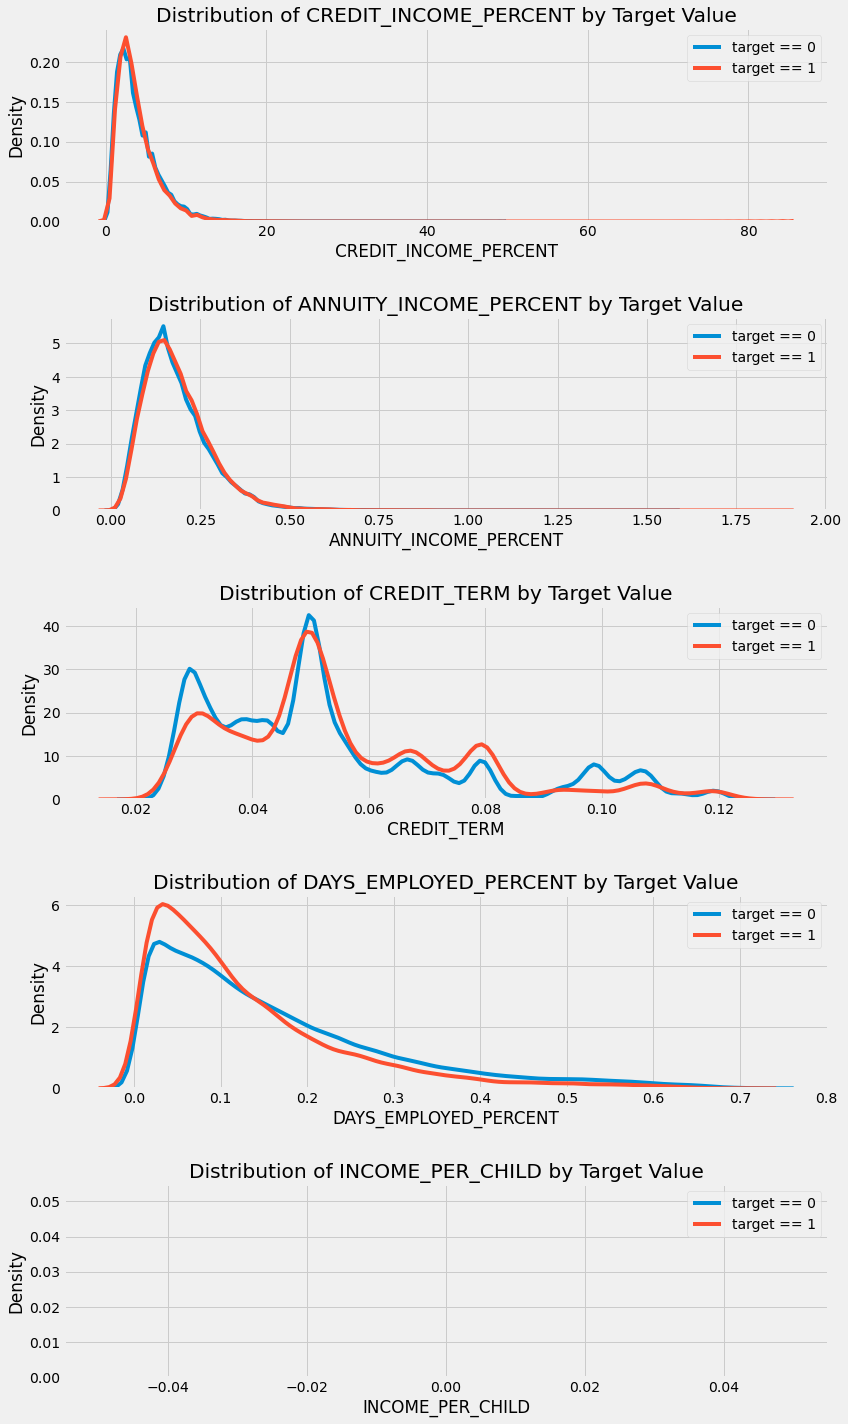

In [24]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT','INCOME_PER_CHILD']):
    
    # create a new subplot for each source
    plt.subplot(5, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

对设计出来的连续性特征查看它们在违约用户和非违约用户中的分布情况，可以发现除CREDIT_TERM这个特征外，其他的特征区分度似乎都不是很明显。

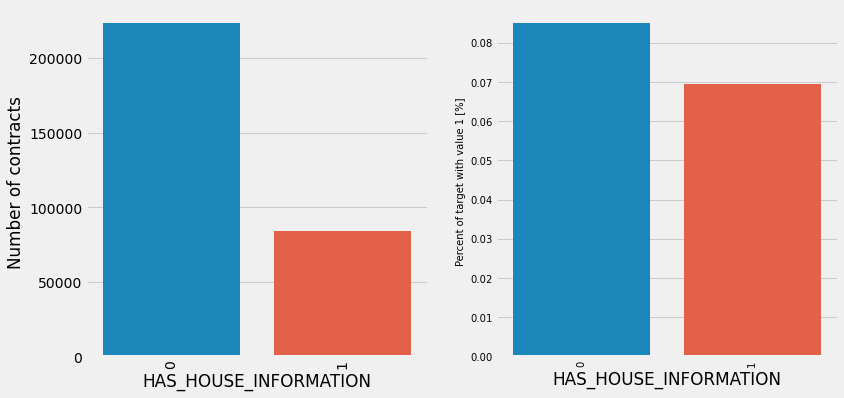

In [25]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train_new[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train_new[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();
    

plot_stats('HAS_HOUSE_INFORMATION', True)

通过缺失值设计的这个特征，通过下图我们可以看到，缺失房屋信息的用户违约概率要明显高于未缺失用户，这在我们模型的预测中可以算是一个比较有效的特征了

In [26]:
# 测试集
app_test_new['CREDIT_INCOME_PERCENT'] = app_test_new['AMT_CREDIT'] / app_test_new['AMT_INCOME_TOTAL']
app_test_new['ANNUITY_INCOME_PERCENT'] = app_test_new['AMT_ANNUITY'] / app_test_new['AMT_INCOME_TOTAL']
app_test_new['CREDIT_TERM'] = app_test_new['AMT_ANNUITY'] / app_test_new['AMT_CREDIT']
app_test_new['DAYS_EMPLOYED_PERCENT'] = app_test_new['DAYS_EMPLOYED'] / app_test_new['DAYS_BIRTH']
app_test_new['INCOME_PER_CHILD'] = app_test_new['AMT_INCOME_TOTAL'] / app_test_new['CNT_CHILDREN']
app_test_new['HAS_HOUSE_INFORMATION'] = app_test_new['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)


### 建模预测
利用现有的主数据集先进行一次建模预测，模型的话选择是LGB模型。

In [27]:
!pip install lightgbm

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [29]:

def model(features, test_features, encoding = 'ohe', n_folds = 5):

    
    #Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=1000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [30]:
submission, fi, metrics = model(app_train_new, app_test_new)
print('Baseline metrics')
print(metrics)

del app_train_new,app_test_new
gc.collect

Training Data Shape:  (307511, 247)
Testing Data Shape:  (48744, 247)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.80448	train's binary_logloss: 0.541625	valid's auc: 0.762541	valid's binary_logloss: 0.557549
Early stopping, best iteration is:
[287]	train's auc: 0.818167	train's binary_logloss: 0.527875	valid's auc: 0.762975	valid's binary_logloss: 0.548994
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.803729	train's binary_logloss: 0.542523	valid's auc: 0.765794	valid's binary_logloss: 0.558268
Early stopping, best iteration is:
[223]	train's auc: 0.807463	train's binary_logloss: 0.538669	valid's auc: 0.765925	valid's binary_logloss: 0.5559
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.80346	train's binary_logloss: 0.54314	valid's auc: 0.769857	valid's binary_logloss: 0.558155
Early stopping, best iteration is:
[253]	train's auc: 0.812386	train's binary_logloss: 0.534094	val

<function gc.collect(generation=2)>

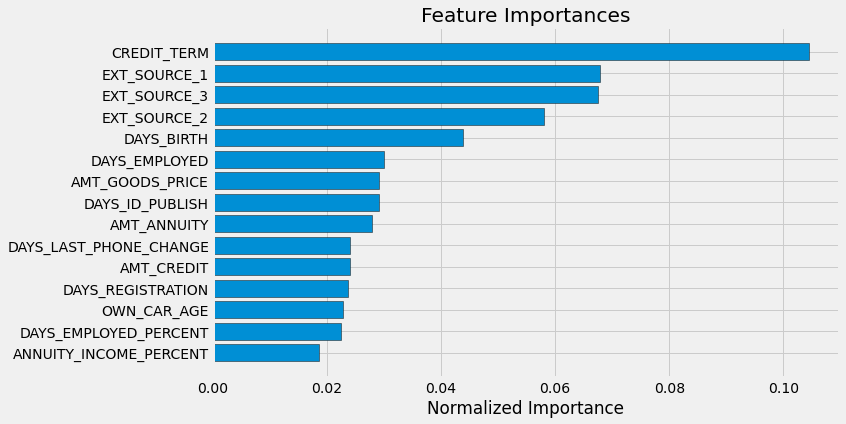

In [31]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.show()
    
    return df
fi_sorted = plot_feature_importances(fi)


## 三、 利用其他数据集信息


### 信用局信息

In [32]:
bureau = pd.read_csv("/kaggle/input/home-credit-default-risk/bureau.csv")
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [33]:
cnt_previous_loan = bureau.groupby('SK_ID_CURR', as_index = False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'cnt_previous_loan'})
cnt_previous_loan

SK_ID_CURR  cnt_previous_loan
0           100001                  7
1           100002                  8
2           100003                  4
3           100004                  2
4           100005                  3
...            ...                ...
305806      456249                 13
305807      456250                  3
305808      456253                  4
305809      456254                  1
305810      456255                 11

[305811 rows x 2 columns]

In [34]:
app_train = app_train.merge(cnt_previous_loan, on = 'SK_ID_CURR', how = 'left')

#fill the missing values with 0
app_train['cnt_previous_loan'] = app_train['cnt_previous_loan'].fillna(0)
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0   
1  ...                 0                0                0   
2  ...                 0                0                0   
3  ...                 0                0                0   
4  ...                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  cnt_previous_loan  
0                        0.0                         1.0                8.0  
1                        0.0                         0.0                4.0  
2                        0.0                         0.0                2.0  
3                        NaN                         NaN                0.0  
4                        0.0                         0.0                1.0  

[5 rows x 123 columns]

In [35]:
print(app_train[app_train.TARGET==1]['cnt_previous_loan'].describe())
print(app_train[app_train.TARGET==0]['cnt_previous_loan'].describe())

count    24825.000000
mean         4.613092
std          4.732792
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         55.000000
Name: cnt_previous_loan, dtype: float64
count    282686.000000
mean          4.778464
std           4.474586
min           0.000000
25%           1.000000
50%           4.000000
75%           7.000000
max         116.000000
Name: cnt_previous_loan, dtype: float64


In [36]:
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

The correlation between cnt_previous_loan and the TARGET is -0.0100
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid =     4.0000


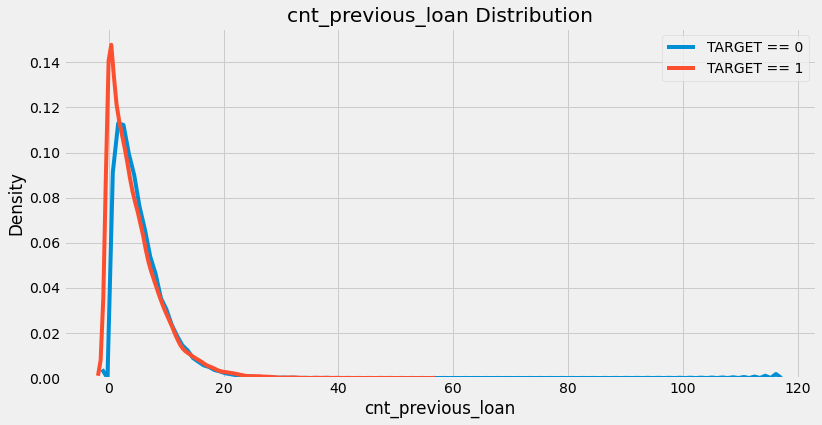

In [37]:
kde_target('cnt_previous_loan', app_train)

### 1、 连续型变量特征提取
对于连续型变量，我们都可以采用计算它们的统计值来作为特征。

In [38]:
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                ... DAYS_CREDIT_UPDATE                               \
  mean max min  ...              count        mean  max   min   sum   
0  0.0   0   0  ...                  7  -93.142857   -6  -155  -652   
1  0.0   0   0  ...                  8 -499.875000   -7 -1185 -3999   
2  0.0   0   0  ...                  4 -816.000000  -43 -2131 -3264   
3  0.0   0   0  ...                  2 -532.000000 -382  -682 -1064   
4  0.0   0   0  ...                  3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [39]:
#进行重新命名
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [40]:
bureau_agg.columns = columns
bureau_agg.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [41]:
app_train = app_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  bureau_DAYS_CREDIT_UPDATE_count bureau_DAYS_CREDIT_UPDATE_mean  \
0  ...                              8.0                       -499.875   
1  ...                              4.0                       -816.000   
2  ...                              2.0                       -532.000   
3  ...                              NaN                            NaN   
4  ...                              1.0                       -783.000   

  bureau_DAYS_CREDIT_UPDATE_max bureau_DAYS_CREDIT_UPDATE_min  \
0                          -7.0                       -1185.0   
1                         -43.0                       -2131.0   
2                        -382.0                        -682.0   
3                           NaN                           NaN   
4                        -783.0                        -783.0   

  bureau_DAYS_CREDIT_UPDATE_sum bureau_AMT_ANNUITY_count  \
0                       -3999.0                      7.0   
1                       -3264.0                      0.0   
2                       -1064.0                      0.0   
3                           NaN                      NaN   
4                        -783.0                      0.0   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0                      0.0                     0.0                     0.0   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   

   bureau_AMT_ANNUITY_sum  
0                     0.0  
1                     0.0  
2                     0.0  
3                     NaN  
4                     0.0  

[5 rows x 183 columns]

In [42]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = app_train['TARGET'].corr(app_train[col])
    
    # Append the list as a tuple

    new_corrs.append((col, corr))

In [43]:
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968668),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392113),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05373489560102051),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758661),
 ('bureau_DAYS_CREDIT_max', 0.049782054639973095),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.04885350261111589),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483543),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730176),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484684),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306004),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329046),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.03428110992161599),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325547)]

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid =     -1067.0000


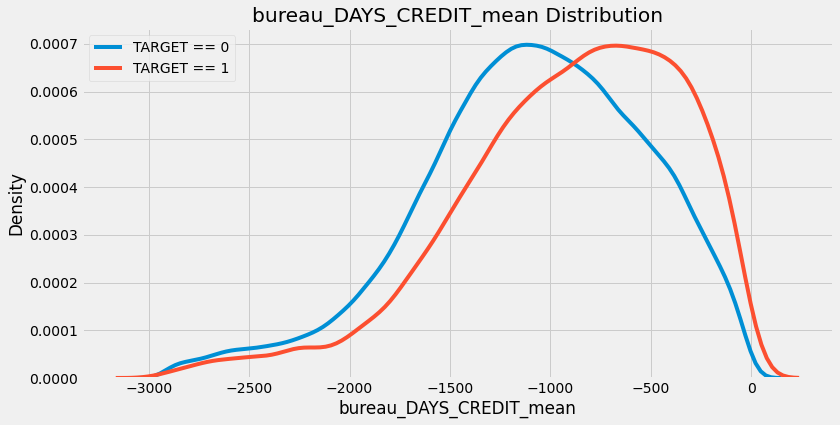

In [44]:
kde_target('bureau_DAYS_CREDIT_mean', app_train)

从图中看发现有一定的区分度

In [45]:
def agg_numeric(df, group_var, df_name):
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [46]:
#看下效果，一个函数完成了上面所有的步骤
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [47]:
#同样再定义一个相关性计算函数
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

### 2、离散型变量特征提取
可以计算离散型特征中每个取值的个数


In [48]:
# 首先把离散型变量变成哑变量
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

CREDIT_ACTIVE_Active  CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  \
0                     0                       0                     1   
1                     1                       0                     0   
2                     1                       0                     0   
3                     1                       0                     0   
4                     1                       0                     0   

   CREDIT_ACTIVE_Sold  CREDIT_CURRENCY_currency 1  CREDIT_CURRENCY_currency 2  \
0                   0                           1                           0   
1                   0                           1                           0   
2                   0                           1                           0   
3                   0                           1                           0   
4                   0                           1                           0   

   CREDIT_CURRENCY_currency 3  CREDIT_CURRENCY_currency 4  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   CREDIT_TYPE_Another type of loan  CREDIT_TYPE_Car loan  ...  \
0                                 0                     0  ...   
1                                 0                     0  ...   
2                                 0                     0  ...   
3                                 0                     0  ...   
4                                 0                     0  ...   

   CREDIT_TYPE_Loan for business development  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   CREDIT_TYPE_Loan for the purchase of equipment  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   CREDIT_TYPE_Loan for working capital replenishment  CREDIT_TYPE_Microloan  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   

   CREDIT_TYPE_Mobile operator loan  CREDIT_TYPE_Mortgage  \
0                                 0                     0   
1                                 0                     0   
2                                 0                     0   
3                                 0                     0   
4                                 0                     0   

   CREDIT_TYPE_Real estate loan  CREDIT_TYPE_Unknown type of loan  SK_ID_CURR  
0                             0                                 0      215354  
1                             0                                 0      215354  
2                             0                                 0      215354  
3                             0                                 0      215354  
4                             0                                 0      215354 

In [49]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                            sum      mean                    sum mean   
SK_ID_CURR                                                              
100001                        3  0.428571                      0  0.0   
100002                        2  0.250000                      0  0.0   
100003                        1  0.250000                      0  0.0   
100004                        0  0.000000                      0  0.0   
100005                        2  0.666667                      0  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                            sum      mean                sum mean   
SK_ID_CURR                                                          
100001                        4  0.571429                  0  0.0   
100002                        6  0.750000                  0  0.0   
100003                        3  0.750000                  0  0.0   
100004                        2  1.000000                  0  0.0   
100005                        1  0.333333                  0  0.0   

           CREDIT_CURRENCY_currency 1       ... CREDIT_TYPE_Microloan       \
                                  sum mean  ...                   sum mean   
SK_ID_CURR                                  ...                              
100001                              7  1.0  ...                     0  0.0   
100002                              8  1.0  ...                     0  0.0   
100003                              4  1.0  ...                     0  0.0   
100004                              2  1.0  ...                     0  0.0   
100005                              3  1.0  ...                     0  0.0   

           CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0  0.0                    0  0.0   
100002                                    0  0.0                    0  0.0   
100003                                    0  0.0                    0  0.0   
100004                                    0  0.0                    0  0.0   
100005                                    0  0.0                    0  0.0   

           CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan  \
                                    sum mean                              sum   
SK_ID_CURR                                                                      
100001                                0  0.0                                0   
100002                                0  0.0                                0   
100003                                0  0.0                                0   
100004                                0  0.0                                0   
100005                                0  0.0                                0   

                 
           mean  
SK_ID_CURR       
100001      0.0  
100002      0.0  
100003      0.0  
100004      0.0  
100005      0.0  

[5 rows x 46 columns]

In [50]:
group_var = 'SK_ID_CURR'

# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

CREDIT_ACTIVE_Active_count  CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                                                
100001                               3                         0.428571   
100002                               2                         0.250000   
100003                               1                         0.250000   
100004                               0                         0.000000   
100005                               2                         0.666667   

            CREDIT_ACTIVE_Bad debt_count  CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                                                    
100001                                 0                                0.0   
100002                                 0                                0.0   
100003                                 0                                0.0   
100004                                 0                                0.0   
100005                                 0                                0.0   

            CREDIT_ACTIVE_Closed_count  CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                                                
100001                               4                         0.571429   
100002                               6                         0.750000   
100003                               3                         0.750000   
100004                               2                         1.000000   
100005                               1                         0.333333   

            CREDIT_ACTIVE_Sold_count  CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                                            
100001                             0                            0.0   
100002                             0                            0.0   
100003                             0                            0.0   
100004                             0                            0.0   
100005                             0                            0.0   

            CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                     
100001                                     7   
100002                                     8   
100003                                     4   
100004                                     2   
100005                                     3   

            CREDIT_CURRENCY_currency 1_count_norm  ...  \
SK_ID_CURR                                         ...   
100001                                        1.0  ...   
100002                                        1.0  ...   
100003                                        1.0  ...   
100004                                        1.0  ...   
100005                                        1.0  ...   

            CREDIT_TYPE_Microloan_count  CREDIT_TYPE_Microloan_count_norm  \
SK_ID_CURR                                                                  
100001                                0                               0.0   
100002                                0                               0.0   
100003                                0                               0.0   
100004                                0                               0.0   
100005                                0                               0.0   

            CREDIT_TYPE_Mobile operator loan_count  \
SK_ID_CURR                                           
100001                                           0   
100002                                           0   
100003                                           0   
100004                                           0   
100005                                           0   

            CREDIT_TYPE_Mobile operator loan_count_norm  \
SK_ID_CURR                                                
100001                                              0.0   
100002                                              0.0   
100003   

In [51]:
#做好的特征可以合并到主训练集中
app_train = app_train.merge(categorical_grouped, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  CREDIT_TYPE_Microloan_count CREDIT_TYPE_Microloan_count_norm  \
0  ...                          0.0                              0.0   
1  ...                          0.0                              0.0   
2  ...                          0.0                              0.0   
3  ...                          NaN                              NaN   
4  ...                          0.0                              0.0   

  CREDIT_TYPE_Mobile operator loan_count  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

  CREDIT_TYPE_Mobile operator loan_count_norm CREDIT_TYPE_Mortgage_count  \
0                                         0.0                        0.0   
1                                         0.0                        0.0   
2                                         0.0                        0.0   
3                                         NaN                        NaN   
4                                         0.0                        0.0   

  CREDIT_TYPE_Mortgage_count_norm  CREDIT_TYPE_Real estate loan_count  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             NaN                                 NaN   
4                             0.0                                 0.0   

   CREDIT_TYPE_Real estate loan_count_norm  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      NaN   
4                                      0.0   

   CREDIT_TYPE_Unknown type of loan_count  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     NaN   
4                                     0.0   

   CREDIT_TYPE_Unknown type of loan_count_norm  
0                                          0.0  
1                                          0.0  
2                                          0.0  
3                                          NaN  
4                                          0.0  

[5 rows x 229 columns]

In [52]:
def count_categorical(df, group_var, df_name):
 
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [53]:
#来看一下效果，一个函数完成了上面的所有步骤
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

bureau_CREDIT_ACTIVE_Active_count  \
SK_ID_CURR                                      
100001                                      3   
100002                                      2   
100003                                      1   
100004                                      0   
100005                                      2   

            bureau_CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                           
100001                                    0.428571   
100002                                    0.250000   
100003                                    0.250000   
100004                                    0.000000   
100005                                    0.666667   

            bureau_CREDIT_ACTIVE_Bad debt_count  \
SK_ID_CURR                                        
100001                                        0   
100002                                        0   
100003                                        0   
100004                                        0   
100005                                        0   

            bureau_CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_ACTIVE_Closed_count  \
SK_ID_CURR                                      
100001                                      4   
100002                                      6   
100003                                      3   
100004                                      2   
100005                                      1   

            bureau_CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                           
100001                                    0.571429   
100002                                    0.750000   
100003                                    0.750000   
100004                                    1.000000   
100005                                    0.333333   

            bureau_CREDIT_ACTIVE_Sold_count  \
SK_ID_CURR                                    
100001                                    0   
100002                                    0   
100003                                    0   
100004                                    0   
100005                                    0   

            bureau_CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                         
100001                                       0.0   
100002                                       0.0   
100003                                       0.0   
100004                                       0.0   
100005                                       0.0   

            bureau_CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                            
100001                                            7   
100002                                            8   
100003                                            4   
100004                                            2   
100005                                            3   

            bureau_CREDIT_CURRENCY_currency 1_count_norm  ...  \
SK_ID_CURR                                                ...   
100001                                               1.0  ...   
100002                                               1.0  ...   
100003                                               1.0  ...   
100004                                               1.0  ...   
100005                                               1.0  ...   

            bureau_CREDIT_TYPE_Microloan_count  \
SK_ID_CURR                                       
100001                                       0   
100002                                       0   
100003                                       0   
100004                      

In [54]:


app_train = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
app_test = pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")
bureau = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau.csv')
previous_application = pd.read_csv('/kaggle/input/home-credit-default-risk/previous_application.csv')


In [55]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_train['INCOME_PER_CHILD'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_CHILDREN']
app_train['HAS_HOUSE_INFORMATION'] = app_train['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)


app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']
app_test['INCOME_PER_CHILD'] = app_test['AMT_INCOME_TOTAL'] / app_test['CNT_CHILDREN']
app_test['HAS_HOUSE_INFORMATION'] = app_test['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)



In [56]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [57]:
app_train = app_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(bureau_agg_new, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_agg_new, on = 'SK_ID_CURR', how = 'left')


In [58]:
previous_appication_counts = count_categorical(previous_application, group_var = 'SK_ID_CURR', df_name = 'previous_application')
previous_appication_agg_new = agg_numeric(previous_application, group_var = 'SK_ID_CURR', df_name = 'previous_application')
previous_appication_agg_new.head()

SK_ID_CURR  previous_application_AMT_ANNUITY_count  \
0      100001                                       1   
1      100002                                       1   
2      100003                                       3   
3      100004                                       1   
4      100005                                       1   

   previous_application_AMT_ANNUITY_mean  \
0                               3951.000   
1                               9251.775   
2                              56553.990   
3                               5357.250   
4                               4813.200   

   previous_application_AMT_ANNUITY_max  previous_application_AMT_ANNUITY_min  \
0                              3951.000                              3951.000   
1                              9251.775                              9251.775   
2                             98356.995                              6737.310   
3                              5357.250                              5357.250   
4                              4813.200                              4813.200   

   previous_application_AMT_ANNUITY_sum  \
0                              3951.000   
1                              9251.775   
2                            169661.970   
3                              5357.250   
4                              4813.200   

   previous_application_AMT_APPLICATION_count  \
0                                           1   
1                                           1   
2                                           3   
3                                           1   
4                                           2   

   previous_application_AMT_APPLICATION_mean  \
0                                   24835.50   
1                                  179055.00   
2                                  435436.50   
3                                   24282.00   
4                                   22308.75   

   previous_application_AMT_APPLICATION_max  \
0                                   24835.5   
1                                  179055.0   
2                                  900000.0   
3                                   24282.0   
4                                   44617.5   

   previous_application_AMT_APPLICATION_min  ...  \
0                                   24835.5  ...   
1                                  179055.0  ...   
2                                   68809.5  ...   
3                                   24282.0  ...   
4                                       0.0  ...   

   previous_application_DAYS_TERMINATION_count  \
0                                            1   
1                                            1   
2                                            3   
3                                            1   
4                                            1   

   previous_application_DAYS_TERMINATION_mean  \
0                                -1612.000000   
1                                  -17.000000   
2                                -1047.333333   
3                                 -714.000000   
4                                 -460.000000   

   previous_application_DAYS_TERMINATION_max  \
0                                    -1612.0   
1                                      -17.0   
2                                     -527.0   
3                                     -714.0   
4                                     -460.0   

   previous_application_DAYS_TERMINATION_min  \
0                                    -1612.0   
1                                      -17.0   
2                                    -1976.0   
3                                     -714.0   
4                                     -460.0   

   previous_application_DAYS_TERMINATION_sum  \
0                                    -1612.0   
1                                      -17.0   
2                                    -3142.0   
3                                     -714.0   
4                                     -460.0   

   pre

In [59]:
app_train = app_train.merge(previous_appication_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(previous_appication_agg_new, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(previous_appication_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(previous_appication_agg_new, on = 'SK_ID_CURR', how = 'left')


In [60]:
print(app_train.shape)
print(app_test.shape)

(307511, 615)
(48744, 614)


### 3、特征筛选
采用相关性

In [61]:
corrs = app_train.corr()

# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])
    


In [62]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  189


在结果中可以看到，我们一共要移除189列具有高相关性的变量

In [63]:
#训练集和测试集都移除对应的列,把列数降低到426
train_corrs_removed = app_train.drop(columns = cols_to_remove)
test_corrs_removed = app_test.drop(columns = cols_to_remove)


print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 426)
Testing Corrs Removed Shape:  (48744, 425)


# 四、建模预测

In [64]:
submission, fi, metrics = model(train_corrs_removed, test_corrs_removed)
print('metrics')
print(metrics)

Training Data Shape:  (307511, 545)
Testing Data Shape:  (48744, 545)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.823552	train's binary_logloss: 0.522717	valid's auc: 0.776964	valid's binary_logloss: 0.540847
[400]	train's auc: 0.857728	train's binary_logloss: 0.485374	valid's auc: 0.777725	valid's binary_logloss: 0.517369
Early stopping, best iteration is:
[312]	train's auc: 0.844323	train's binary_logloss: 0.500128	valid's auc: 0.778176	valid's binary_logloss: 0.526652
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.823717	train's binary_logloss: 0.522621	valid's auc: 0.778	valid's binary_logloss: 0.54048
[400]	train's auc: 0.858818	train's binary_logloss: 0.484301	valid's auc: 0.778152	valid's binary_logloss: 0.517122
Early stopping, best iteration is:
[328]	train's auc: 0.847749	train's binary_logloss: 0.496496	valid's auc: 0.778833	valid's binary_logloss: 0.524496
Training until validation scores don't impro

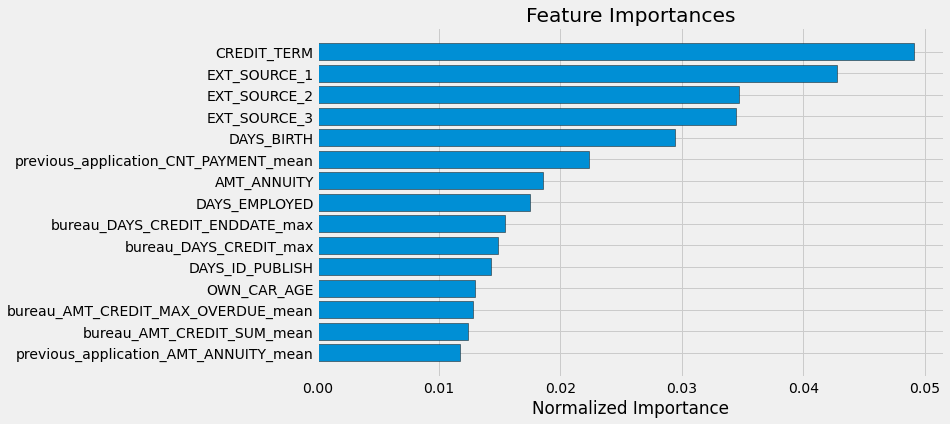

In [65]:
fi_sorted = plot_feature_importances(fi)

In [66]:
submission

SK_ID_CURR    TARGET
0          100001  0.264473
1          100005  0.583314
2          100013  0.146602
3          100028  0.351669
4          100038  0.737223
...           ...       ...
48739      456221  0.309341
48740      456222  0.487798
48741      456223  0.080115
48742      456224  0.350004
48743      456250  0.785359

[48744 rows x 2 columns]

In [67]:
submission['TARGET'] = submission['TARGET'].apply(lambda x: 1 if x>=0.5 else 0)

In [68]:
submission

SK_ID_CURR  TARGET
0          100001       0
1          100005       1
2          100013       0
3          100028       0
4          100038       1
...           ...     ...
48739      456221       0
48740      456222       0
48741      456223       0
48742      456224       0
48743      456250       1

[48744 rows x 2 columns]

In [69]:
submission.to_csv('submission.csv',index = False)